### Importando as Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importando o Dataset

In [2]:
df = pd.read_csv('listings.csv', usecols = ['room_type', 'price'])

In [3]:
df.head()

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55


In [28]:
df

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55
...,...,...
5592,Entire home/apt,128
5593,Entire home/apt,100
5594,Entire home/apt,400
5595,Entire home/apt,60


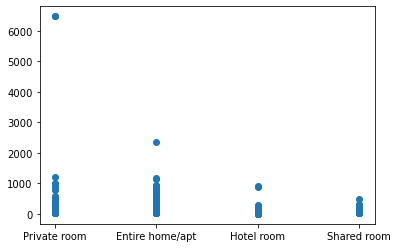

In [4]:
plt.scatter(df.room_type, df.price)
plt.show()

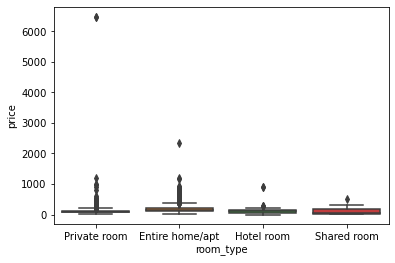

In [5]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()

In [6]:
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQ = Q3 - Q1
    LI = df < (Q1 - 1.5*IQ)
    LS = df > (Q3 + 1.5*IQ)
    
    df_final = df[~(LI | LS)]
    return df_final

In [7]:
df_removido = remove_outlier(df.price)
df_removido = pd.DataFrame(df_removido)


In [8]:
df_removido

,price
0,59
1,106
2,135
3,75
4,55
...,...
5591,52
5592,128
5593,100
5595,60


In [9]:
ind_dif = df.index.difference(df_removido.index)

In [10]:
ind_dif

Int64Index([  38,   44,   52,   60,   86,  106,  113,  124,  148,  149,
            ...
            5423, 5430, 5431, 5432, 5460, 5489, 5511, 5515, 5516, 5594],
           dtype='int64', length=259)

### Substituir os Outliers pela Média da Coluna 'Price'

In [11]:
media_price = df.price.mean()
print(media_price)

163.92871180989815


In [12]:
for i in range(0, len(ind_dif), 1):
    df.loc[ind_dif[i], 'price'] = media_price

In [13]:
ind_dif[0]

38

In [38]:
df.head(39)

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55
5,Entire home/apt,240
6,Entire home/apt,160
7,Entire home/apt,250
8,Private room,118
9,Entire home/apt,222


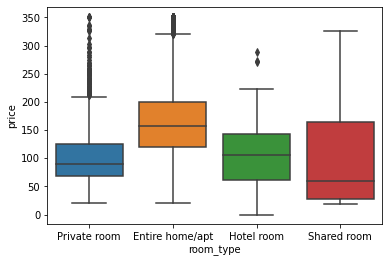

In [14]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()